# Setup Background Database

This project requires as background database [ecoinvent 3.9.1](https://ecoinvent.org/)

Here is a sample piece of code on how to install it in a project. Make sure you keep the project name as well as the name for ecoinvent for the next notebooks.

Today, there are a couple of alternatives on how to install Ecoinvent on a project:

- restoring a project that already has ecoinvent
- import from source EcoSpold files
- import using [ecoinvent_interface](https://github.com/brightway-lca/ecoinvent_interface/)

Sample instructions on each alternative are provided below, but it is important to notice that you should only use one of them, and that the project name and ecoinvent database name must be kept the same in the following notebooks.

## Project name and background database name

To make it easier to re-use the project name and background database name in the other notebooks, we will write those variables to a python script called [project_details.py](project_details.py) with the following variables:

- `PROJECT_NAME`
- `EI_DB_NAME`

In [1]:
# We start by importing the variables with the project name and background db
import bw2data as bd
import bw2io as bi
from project_details import EI_DB_NAME, PROJECT_NAME

## Alternative 1. Restoring a project

You can re-use a project where you already had the background database installed. However, you will need to set the `EI_DB_NAME` to match that of the project you restored.


In [ ]:
import bw2data as bd
import bw2io as bi

# Provide a path to where you had backed-up your project
project_path = (
    "/home/somesamplebud/brightway2-project-ei-backup.13-October-2023-09-33AM.tar.gz"
)

bi.restore_project_directory(project_path, PROJECT_NAME)

After the previous cell, make sure you set up the variable `EI_DB_NAME` in the [project_details.py](project_details.py) file to whatever your ecoinvent database is called inside the restored project.

## Alternative 2: Import from Source EcoSpold Files

This has been for a long time the first choice, but the previous two alternatives can be faster and less prone to errors.


In [4]:
import bw2data as bd
import bw2io as bi

bd.projects.set_current(PROJECT_NAME)
bi.bw2setup()

# Set path to the location where the EcoSpold files are found
EI_PATH = "/Users/andreavargasf/ua_pmlca/ua_pmlca/notebooks/ecoinvent 3.9.1_cutoff_ecoSpold02/datasets"

if EI_DB_NAME in bd.databases:
    print(f"{EI_DB_NAME} Database has already been imported.")
else:
    # Go ahead and import:
    ei_importer = bi.SingleOutputEcospold2Importer(EI_PATH, EI_DB_NAME)
    # Apply strategies
    ei_importer.apply_strategies()
    # Get some statistics
    ei_importer.statistics()
    # Write the database into our project
    ei_importer.write_database()

Biosphere database already present!!! No setup is needed
Extracting XML data from 21238 datasets
Extracted 21238 datasets in 13.60 seconds
Applying strategy: normalize_units
Applying strategy: update_ecoinvent_locations
Applying strategy: remove_zero_amount_coproducts
Applying strategy: remove_zero_amount_inputs_with_no_activity
Applying strategy: remove_unnamed_parameters
Applying strategy: es2_assign_only_product_with_amount_as_reference_product
Applying strategy: assign_single_product_as_activity
Applying strategy: create_composite_code
Applying strategy: drop_unspecified_subcategories
Applying strategy: fix_ecoinvent_flows_pre35
Applying strategy: drop_temporary_outdated_biosphere_flows
Applying strategy: link_biosphere_by_flow_uuid
Applying strategy: link_internal_technosphere_by_composite_code
Applying strategy: delete_exchanges_missing_activity
Applying strategy: delete_ghost_exchanges
Applying strategy: remove_uncertainty_from_negative_loss_exchanges
Applying strategy: fix_unre

100%|███████████████████████████████████| 21238/21238 [00:12<00:00, 1681.09it/s]


Vacuuming database 
Created database: ecoinvent-391-cutoff


## Alternative 3

In [2]:
bd.projects.set_current(PROJECT_NAME)
bi.import_ecoinvent_release(
    version="3.9.1",
    system_model="cutoff",
    username=EI_USER,
    password=EI_PASSWORD,
    biosphere_name="biosphere3",
)

Applying strategy: normalize_units
Applying strategy: drop_unspecified_subcategories
Applying strategy: ensure_categories_are_tuples
Applied 3 strategies in 0.00 seconds
4718 datasets
0 exchanges
0 unlinked exchanges
  


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4718/4718 [00:00<00:00, 45233.86it/s]


Vacuuming database 
Created database: biosphere3
Extracting XML data from 21238 datasets
Extracted 21238 datasets in 35.73 seconds
Applying strategy: normalize_units
Applying strategy: update_ecoinvent_locations
Applying strategy: remove_zero_amount_coproducts
Applying strategy: remove_zero_amount_inputs_with_no_activity
Applying strategy: remove_unnamed_parameters
Applying strategy: es2_assign_only_product_with_amount_as_reference_product
Applying strategy: assign_single_product_as_activity
Applying strategy: create_composite_code
Applying strategy: drop_unspecified_subcategories
Applying strategy: fix_ecoinvent_flows_pre35
Applying strategy: drop_temporary_outdated_biosphere_flows
Applying strategy: link_biosphere_by_flow_uuid
Applying strategy: link_internal_technosphere_by_composite_code
Applying strategy: delete_exchanges_missing_activity
Applying strategy: delete_ghost_exchanges
Applying strategy: remove_uncertainty_from_negative_loss_exchanges
Applying strategy: fix_unreasonably

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21238/21238 [00:17<00:00, 1215.50it/s]


Vacuuming database 
Created database: ecoinvent-3.9.1-cutoff


In [3]:
# Check the databases that are included in the project
import bw2data as bd
import bw2io as bi

bd.projects.set_current(PROJECT_NAME)
bd.databases

Databases dictionary with 2 object(s):
	biosphere3
	ecoinvent-3.9.1-cutoff

## Final verifications

The imported ecoinvent database is of type <class 'bw2data.backends.base.SQLiteBackend'> and has a length of 21238.


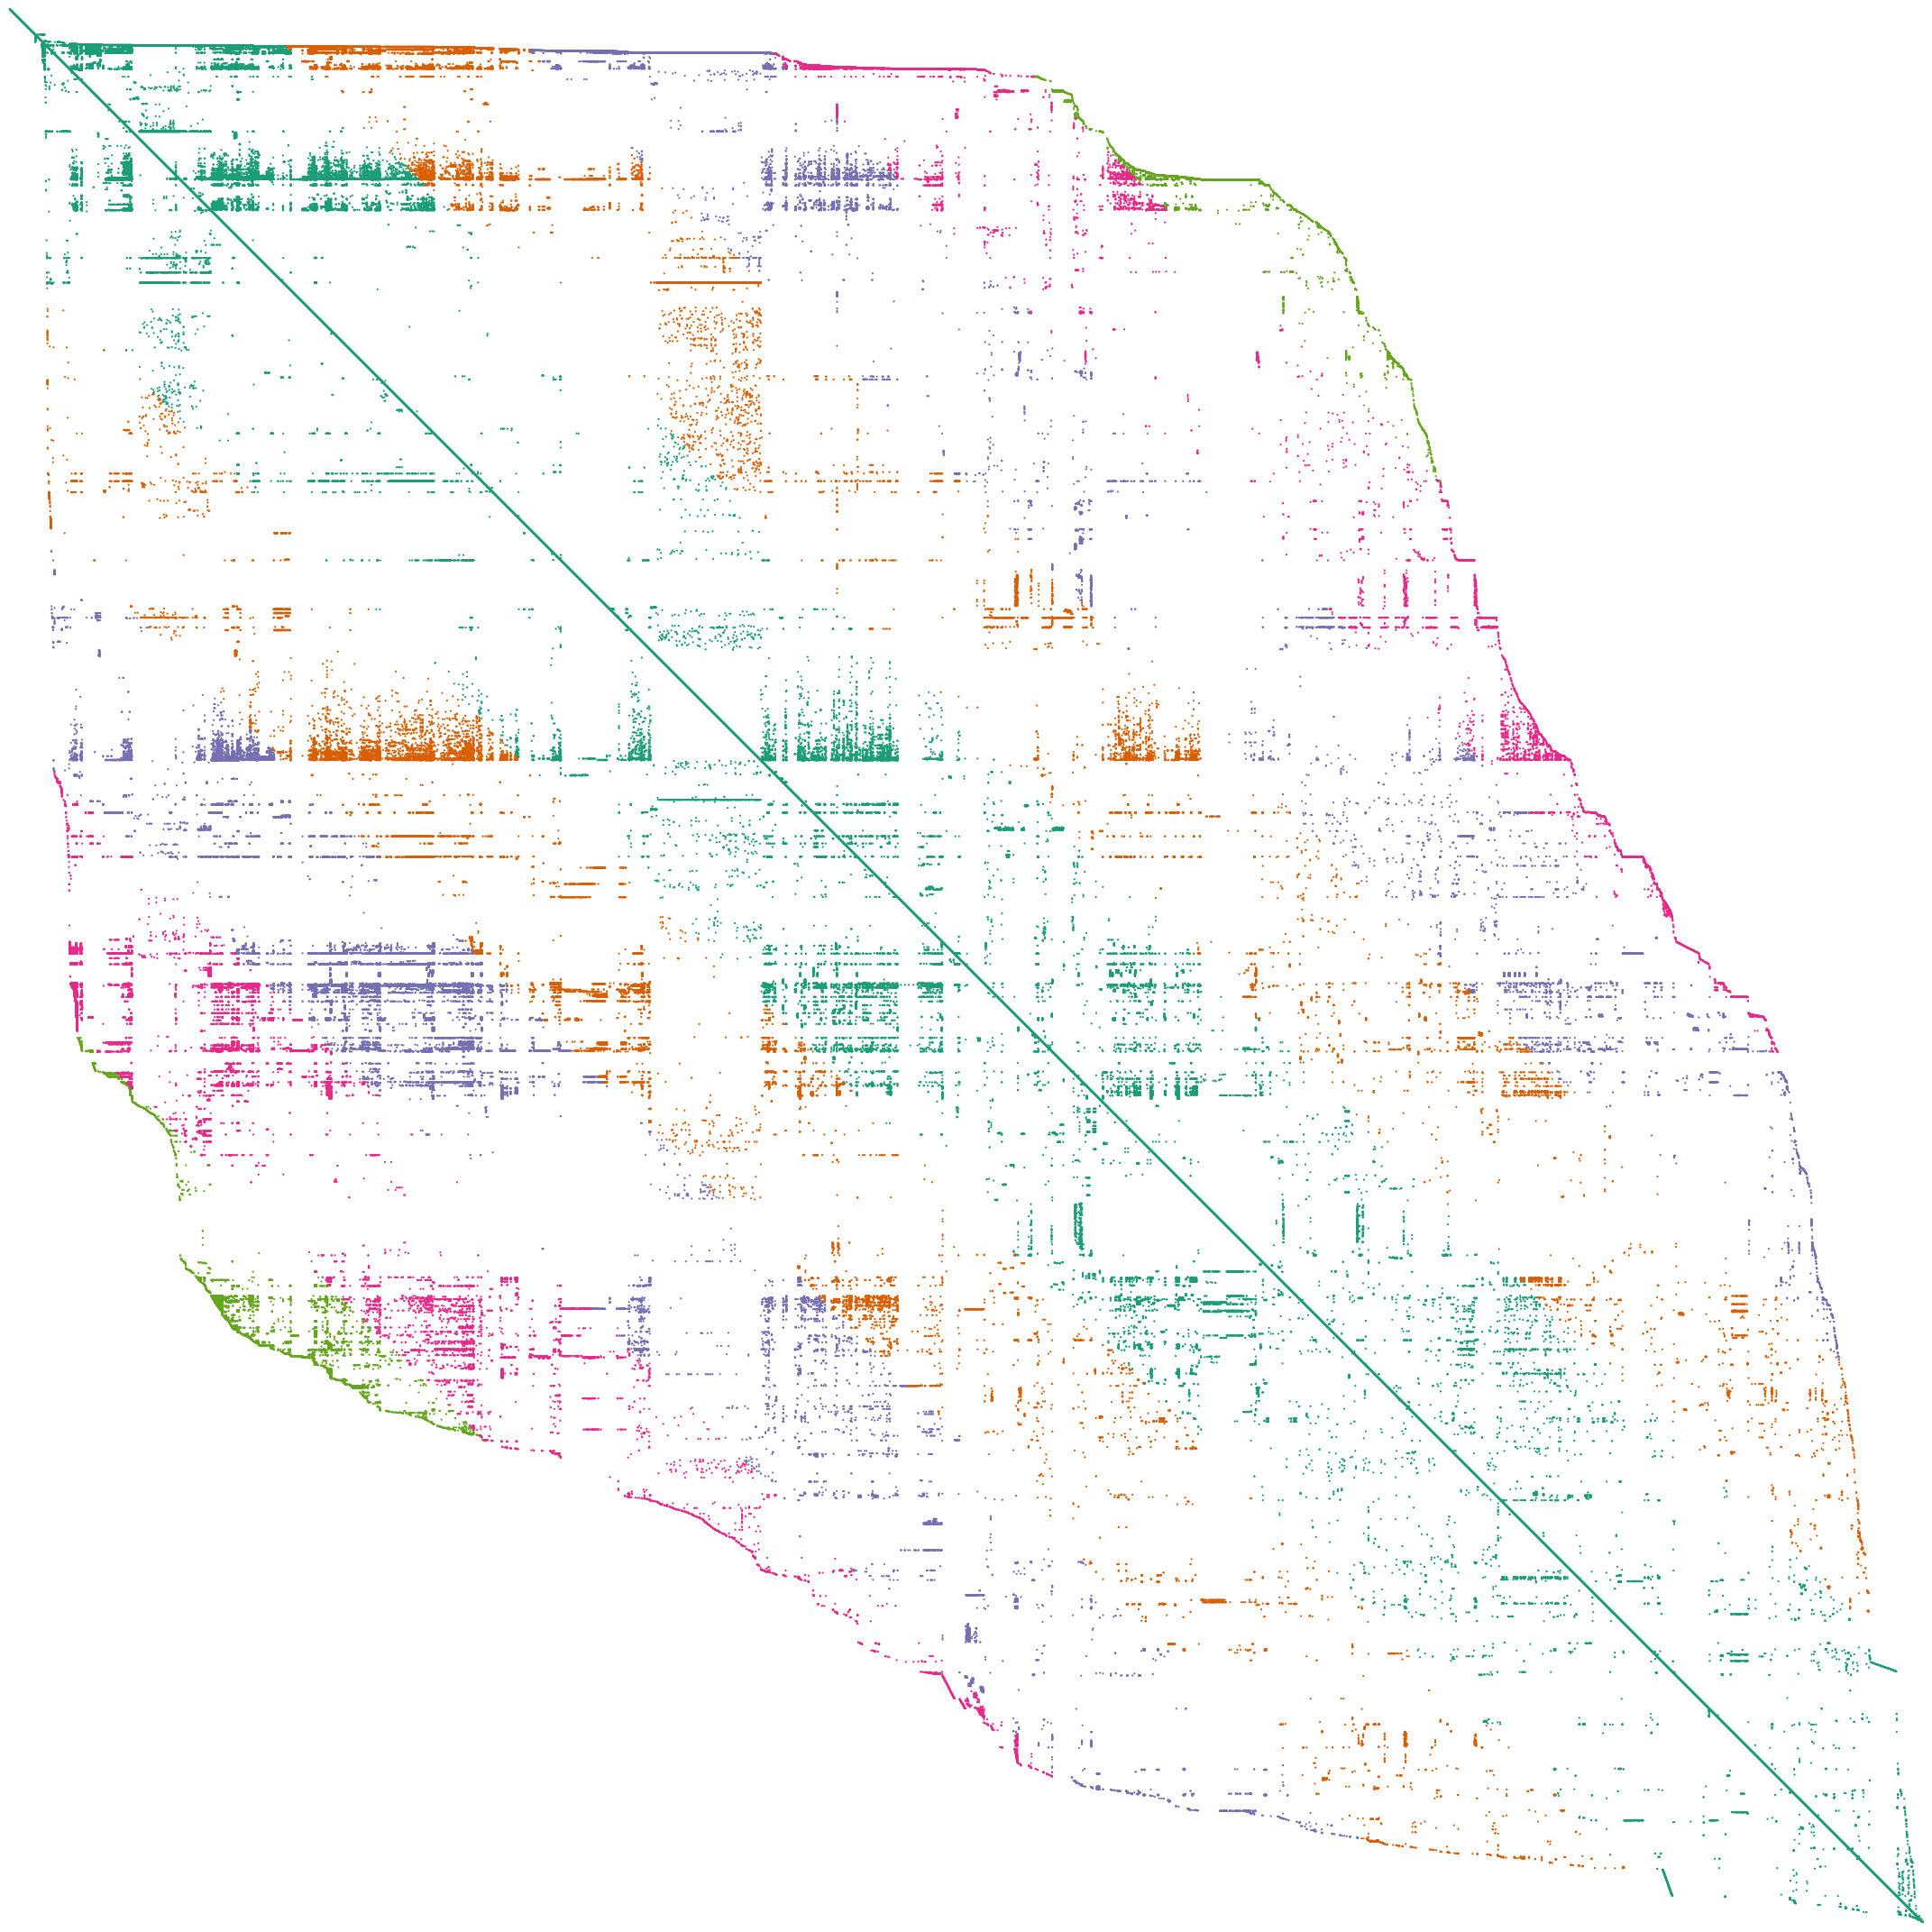

In [4]:
bd.projects.set_current(PROJECT_NAME)
eidb = bd.Database(EI_DB_NAME)
print(
    "The imported ecoinvent database is of type {} and has a length of {}.".format(
        type(eidb), len(eidb)
    )
)
eidb.graph_technosphere()